In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from latexify import *
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches

In [9]:
# Choose some points between

In [10]:
np.random.seed(0)
x1 = np.random.randn(1, 100)
x2 = np.random.randn(1, 100)


In [11]:
y = x1**2 + x2**2

In [12]:
x1

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
         0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
         0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
        -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
        -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
         0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
         0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
        -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
        -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
        -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
         0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
        -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
        -0.40178094, -1.63019835,  0.46278226, -0.9

In [13]:
y[y>1] = 1
y[y<1] = 0

c = 0
for i in range(100):
    if y[0, i] == 1:
        y[0, i] = 0
        c += 1
    if c == 10:
        break

Text(0, 0.5, 'x2')

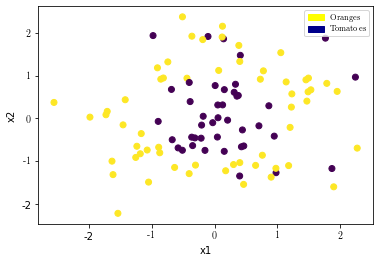

In [14]:
plt.scatter(x1, x2, c=y)
latexify()
yellow_patch = mpatches.Patch(color='yellow', label='Oranges')
blue_patch = mpatches.Patch(color='darkblue', label='Tomatoes')
plt.legend(handles=[yellow_patch, blue_patch])
plt.xlabel("x1")
plt.ylabel("x2")

In [15]:
new_x = np.zeros((4, 100))


In [16]:
new_x[0] = x1
new_x[1] = x2
new_x[2] = x1**2
new_x[3] = x2**2

In [17]:
clf = LogisticRegression(penalty='none',solver='newton-cg')

In [18]:
clf.fit(new_x.T, y.T)

/Users/ritikdutta/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
clf.coef_

array([[-0.50464855, -0.30337009,  1.08937351,  0.73697949]])

In [20]:
new_x.T[:, 0]

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.05

In [21]:
X = np.vstack((x1, x2)).T
X.shape

(100, 2)

Text(0, 0.5, 'x2')

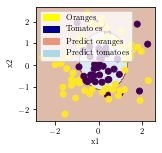

In [22]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
y_min, y_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))





Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), np.square(xx.ravel()), np.square(yy.ravel())])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
latexify()
yellow_patch = mpatches.Patch(color='yellow', label='Oranges')
blue_patch = mpatches.Patch(color='darkblue', label='Tomatoes')
pink_patch = mpatches.Patch(color='darksalmon', label='Predict oranges')
lblue_patch = mpatches.Patch(color='lightblue', label='Predict tomatoes')
plt.legend(handles=[yellow_patch, blue_patch, pink_patch, lblue_patch])

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)
plt.gca().set_aspect('equal')
plt.scatter(x1, x2, c=y)
plt.xlabel("x1")
plt.ylabel("x2")

In [23]:
Z.shape

(261, 272)

In [24]:
np.c_[xx.ravel(), yy.ravel(), np.square(xx.ravel()), np.square(yy.ravel())]

array([[-2.85298982, -2.52340315,  8.13955089,  6.36756347],
       [-2.83298982, -2.52340315,  8.0258313 ,  6.36756347],
       [-2.81298982, -2.52340315,  7.9129117 ,  6.36756347],
       ...,
       [ 2.52701018,  2.67659685,  6.38578047,  7.16417069],
       [ 2.54701018,  2.67659685,  6.48726088,  7.16417069],
       [ 2.56701018,  2.67659685,  6.58954129,  7.16417069]])

In [25]:
xx.ravel()

array([-2.85298982, -2.83298982, -2.81298982, ...,  2.52701018,
        2.54701018,  2.56701018])

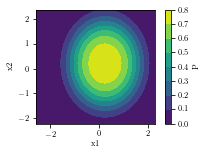

In [26]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - h, X[:, 0].max() + h
y_min, y_max = X[:, 1].min() - h, X[:, 1].max() + h
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))





Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel(), np.square(xx.ravel()), np.square(yy.ravel())])
# Put the result into a color plot
Z = Z[:, 0].reshape(xx.shape)
latexify()
plt.contourf(xx, yy, Z,)
plt.gca().set_aspect('equal')
#plt.scatter(x1, x2, c=y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar(label='P')


In [27]:
Z.shape

(233, 244)

In [28]:
xx.shape

(233, 244)

In [29]:
Z.size

56852

In [30]:
Z[:, 0]

array([8.49657908e-06, 9.13003276e-06, 9.80492998e-06, 1.05235092e-05,
       1.12880936e-05, 1.21010915e-05, 1.29649967e-05, 1.38823887e-05,
       1.48559324e-05, 1.58883775e-05, 1.69825580e-05, 1.81413909e-05,
       1.93678750e-05, 2.06650891e-05, 2.20361898e-05, 2.34844094e-05,
       2.50130523e-05, 2.66254926e-05, 2.83251697e-05, 3.01155846e-05,
       3.20002950e-05, 3.39829103e-05, 3.60670864e-05, 3.82565191e-05,
       4.05549382e-05, 4.29660999e-05, 4.54937797e-05, 4.81417642e-05,
       5.09138427e-05, 5.38137978e-05, 5.68453963e-05, 6.00123789e-05,
       6.33184498e-05, 6.67672655e-05, 7.03624235e-05, 7.41074502e-05,
       7.80057889e-05, 8.20607864e-05, 8.62756804e-05, 9.06535860e-05,
       9.51974814e-05, 9.99101940e-05, 1.04794386e-04, 1.09852541e-04,
       1.15086946e-04, 1.20499680e-04, 1.26092597e-04, 1.31867313e-04,
       1.37825186e-04, 1.43967309e-04, 1.50294488e-04, 1.56807232e-04,
       1.63505734e-04, 1.70389863e-04, 1.77459145e-04, 1.84712754e-04,
      